# Exploratory Data Analysis
### Build data profiles and tables
Inferential statistics

● Explore data relationships

Data visualization

● Feature Selection and Engineering

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error

from library.sb_utils import save_file
from library.preprocess import jlcap_pet_add_city_populations

In [61]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [62]:
adopted = pd.read_csv('data/cats_cleaned.csv')
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    6800 non-null   object 
 1   gender                 6800 non-null   object 
 2   size                   6800 non-null   object 
 3   coat                   6561 non-null   object 
 4   distance               6800 non-null   float64
 5   spayed_neutered        6800 non-null   bool   
 6   house_trained          6800 non-null   bool   
 7   declawed               6800 non-null   bool   
 8   special_needs          6800 non-null   bool   
 9   shots_current          6800 non-null   bool   
 10  breed_primary          6800 non-null   object 
 11  breed_secondary        1428 non-null   object 
 12  breed_mixed            6800 non-null   bool   
 13  breed_unknown          6800 non-null   bool   
 14  color_primary          6378 non-null   object 
 15  colo

In [63]:
adopted.sample(1)

,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city
2032,Baby,Female,Medium,Medium,1.95660,True,True,False,False,True,Domestic Medium Hair,NaN,False,False,Tabby (Brown / Chocolate),Tabby (Buff / Tan / Fawn),White,NaN,NaN,NaN,True,False,0.84014,Woodinville


# Add populations to adopted

In [64]:
adopted_pops = jlcap_pet_add_city_populations(adopted)
adopted_pops.head()

,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city,population
0,Baby,Male,Medium,Medium,7.50180,False,False,False,False,True,Domestic Medium Hair,NaN,False,False,Tabby (Gray / Blue / Silver),NaN,NaN,NaN,NaN,NaN,True,False,2.58473,Puyallup,38720.00000
1,Baby,Male,Medium,Medium,7.50180,False,False,False,False,True,Domestic Medium Hair,NaN,False,False,Tabby (Gray / Blue / Silver),NaN,NaN,NaN,NaN,NaN,True,False,10.62697,Puyallup,38720.00000
2,Young,Female,Medium,Short,7.50180,False,False,False,False,True,Domestic Short Hair,NaN,False,False,Black,NaN,NaN,NaN,NaN,NaN,True,False,30.96750,Puyallup,38720.00000
3,Adult,Female,Medium,Short,7.50180,False,False,False,False,True,Domestic Short Hair,NaN,False,False,Tabby (Orange / Red),NaN,NaN,NaN,NaN,True,True,False,110.01177,Puyallup,38720.00000
4,Young,Female,Medium,Short,7.50180,True,False,False,False,True,Domestic Short Hair,NaN,False,False,Black & White / Tuxedo,NaN,NaN,True,True,NaN,True,False,81.00318,Puyallup,38720.00000


In [65]:
adopted_pops.shape, adopted.shape

((6800, 25), (6800, 24))

In [66]:
adopted = adopted_pops

## Handling missing values

In [67]:
adopted.isnull().sum()

age                         0
gender                      0
size                        0
coat                      239
distance                    0
spayed_neutered             0
house_trained               0
declawed                    0
special_needs               0
shots_current               0
breed_primary               0
breed_secondary          5372
breed_mixed                 0
breed_unknown               0
color_primary             422
color_secondary          4976
color_tertiary           6491
goodwith_children        4384
goodwith_dogs            5047
goodwith_cats            3070
hasimage                    0
hasvideo                    0
duration_as_adoptable       0
city                        0
population                172
dtype: int64

In [68]:
adopted['coat'].fillna('unknown', inplace=True)
adopted['goodwith_children'].fillna('unknown', inplace=True)
adopted['goodwith_dogs'].fillna('unknown', inplace=True)
adopted['goodwith_cats'].fillna('unknown', inplace=True)
adopted['color_primary'].fillna('unknown', inplace=True)
adopted['color_secondary'].fillna('none', inplace=True)
adopted['color_tertiary'].fillna('none', inplace=True)

In [69]:
adopted.isnull().sum()

age                         0
gender                      0
size                        0
coat                        0
distance                    0
spayed_neutered             0
house_trained               0
declawed                    0
special_needs               0
shots_current               0
breed_primary               0
breed_secondary          5372
breed_mixed                 0
breed_unknown               0
color_primary               0
color_secondary             0
color_tertiary              0
goodwith_children           0
goodwith_dogs               0
goodwith_cats               0
hasimage                    0
hasvideo                    0
duration_as_adoptable       0
city                        0
population                172
dtype: int64

In [70]:
adopted.breed_secondary.fillna('none', inplace=True)

In [71]:
adopted[adopted.population.isnull()]

,age,gender,size,coat,distance,spayed_neutered,house_trained,declawed,special_needs,shots_current,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,color_tertiary,goodwith_children,goodwith_dogs,goodwith_cats,hasimage,hasvideo,duration_as_adoptable,city,population
205,Baby,Male,Medium,unknown,2.35660,True,True,False,False,True,Domestic Short Hair,none,True,False,Black,none,none,True,True,True,True,False,1.82000,Edmonds,nan
678,Adult,Male,Large,Short,7.09720,True,True,False,False,True,American Shorthair,Tabby,True,False,Orange / Red,none,none,unknown,True,True,True,False,3.05625,Bow,nan
682,Adult,Female,Large,Long,7.09720,False,True,False,False,False,Maine Coon,Tortoiseshell,True,False,unknown,none,none,unknown,unknown,unknown,True,False,9.86324,Bow,nan
683,Adult,Male,Large,Medium,7.09720,False,True,False,False,False,Maine Coon,none,True,False,Orange & White,none,none,unknown,unknown,unknown,True,False,8.00291,Bow,nan
744,Adult,Male,Large,Short,7.09720,False,True,False,False,False,Snowshoe,Siamese,True,False,unknown,none,none,unknown,unknown,unknown,True,False,10.24082,Bow,nan
755,Young,Female,Large,Medium,7.09720,False,True,False,False,False,Maine Coon,Torbie,True,False,unknown,none,none,True,True,True,True,False,7.69030,Bow,nan
783,Adult,Male,Large,Short,7.09720,False,True,False,False,False,Tiger,Siamese,True,False,Orange / Red,none,none,unknown,unknown,True,True,False,19.44487,Bow,nan
784,Adult,Male,Large,Short,7.09720,False,True,False,False,False,Tiger,Snowshoe,True,False,Orange & White,none,none,unknown,unknown,True,True,False,10.47334,Bow,nan
802,Adult,Male,Extra Large,Short,7.09720,False,True,False,False,False,Turkish Van,Siamese,True,False,unknown,none,none,True,True,True,True,False,14.26738,Bow,nan
808,Adult,Male,Medium,Short,6.31410,True,True,False,False,True,Siamese,none,False,False,Brown / Chocolate,none,none,False,False,False,True,False,4.97519,Camano Island,nan


In [72]:
adopted.dropna(inplace=True)
adopted.isnull().sum()

age                      0
gender                   0
size                     0
coat                     0
distance                 0
spayed_neutered          0
house_trained            0
declawed                 0
special_needs            0
shots_current            0
breed_primary            0
breed_secondary          0
breed_mixed              0
breed_unknown            0
color_primary            0
color_secondary          0
color_tertiary           0
goodwith_children        0
goodwith_dogs            0
goodwith_cats            0
hasimage                 0
hasvideo                 0
duration_as_adoptable    0
city                     0
population               0
dtype: int64

In [73]:
# save cleaned df_dogs
datapath = 'data'
save_file(adopted, 'cats_cleaned_ready.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/cats_cleaned_ready.csv"


# EDA Time

**Dependent Variable: duration_as_adoptable**

In [74]:
adopted.duration_as_adoptable.describe()

count   6628.00000
mean      32.05886
std       64.09621
min        0.00042
25%        3.68448
50%       11.10585
75%       31.97598
max      778.99654
Name: duration_as_adoptable, dtype: float64

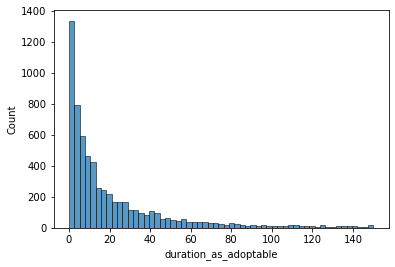

In [75]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted, binrange=(0, 150))

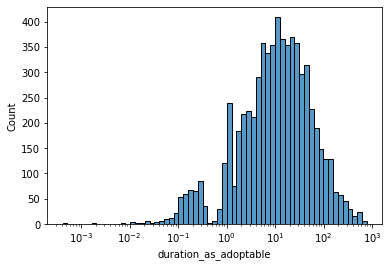

In [76]:
sns.histplot(x='duration_as_adoptable', stat='count', data=adopted, log_scale=True)

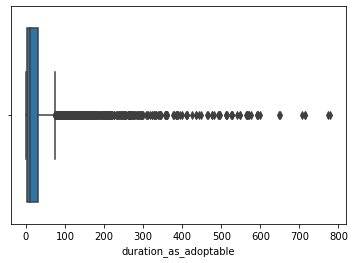

In [77]:
sns.boxplot(data=adopted, x='duration_as_adoptable')

In [80]:
adopted.describe()

,distance,duration_as_adoptable,population
count,6628.00000,6628.00000,6628.00000
mean,3.98462,32.05886,47617.88956
std,2.66997,64.09621,90487.51339
min,0.00020,0.00042,437.00000
25%,1.95660,3.68448,9208.00000
50%,3.14590,11.10585,24682.00000
75%,6.64220,31.97598,67391.00000
max,9.99320,778.99654,653017.00000


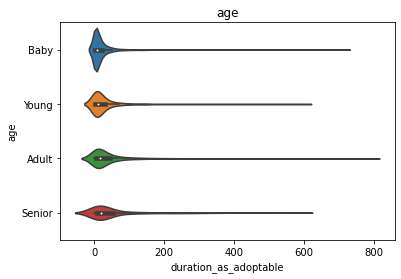

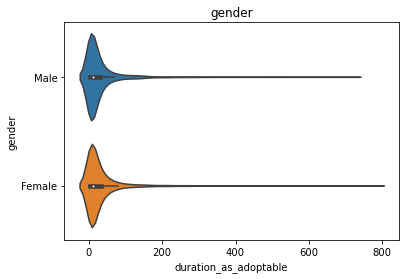

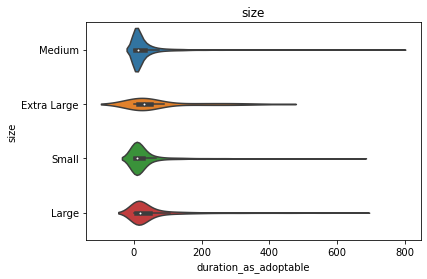

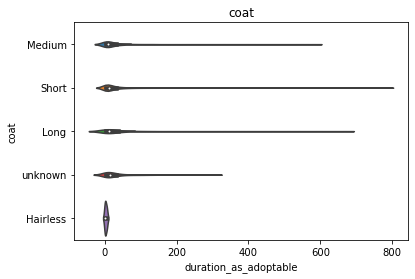

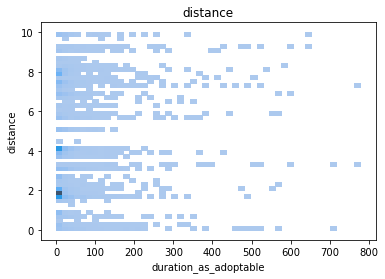

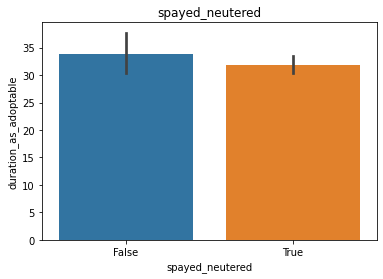

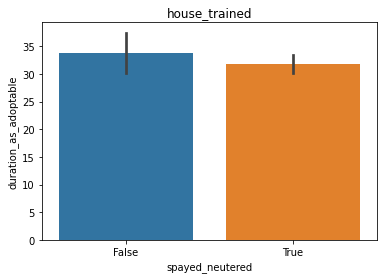

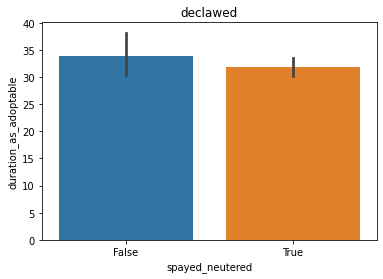

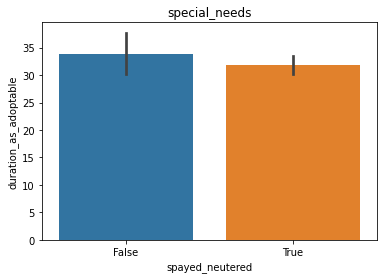

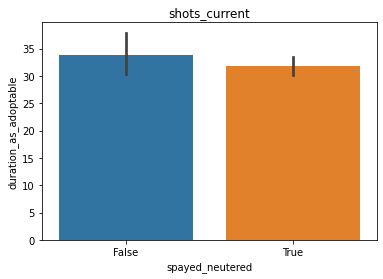

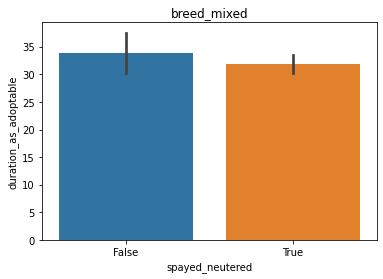

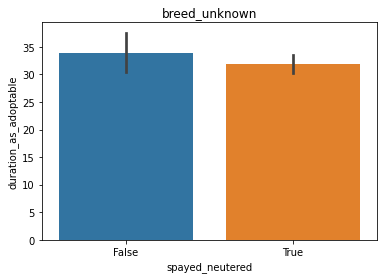

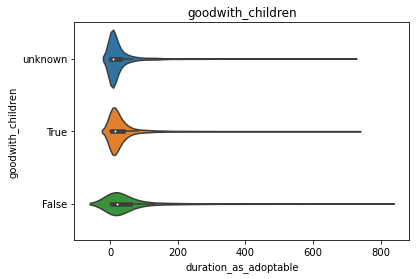

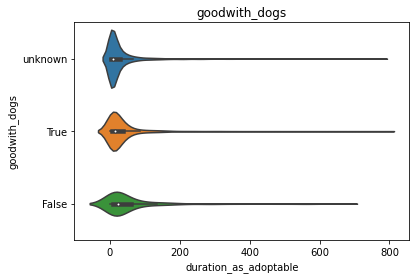

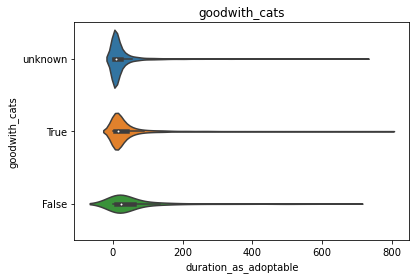

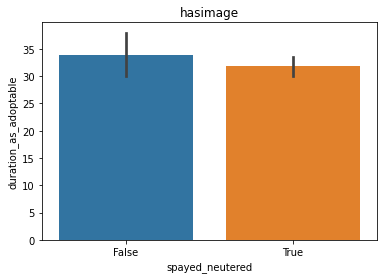

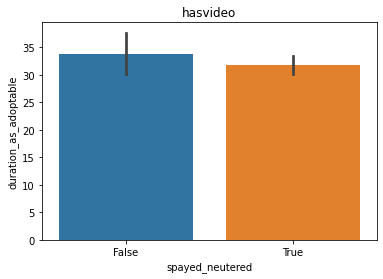

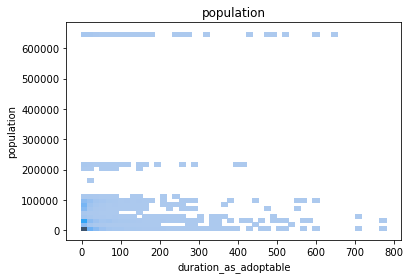

In [81]:
for feat in adopted.drop('duration_as_adoptable', axis=1):
    
    if adopted[feat].dtype == 'bool':
        sns.barplot(x='spayed_neutered', y='duration_as_adoptable', data=adopted)
        plt.title(feat)
        plt.show()
    elif adopted[feat].dtype == 'float64' :
        sns.histplot(x='duration_as_adoptable', y=feat, data=adopted, bins=50)
        plt.title(feat)
        plt.show()
    elif adopted[feat].dtype == 'object' :
        if len(adopted[feat].unique()) <= 10 :
            sns.violinplot(x='duration_as_adoptable', y=feat, data=adopted)
            plt.title(feat)
            plt.show()
#         else :
#             counts = adopted[feat].value_counts()
#             counts.iloc[:10].plot(kind="barh")
#             plt.title(feat)
#             plt.show()
        

**Do larger cities have faster average adoption rates?**

In [82]:
census = pd.read_csv('data/census_wa_cleaned.csv')
census.set_index('index', inplace=True)
census_pop = census.loc[:,'Total population']

In [83]:
# Do larger cities have faster average adoption rates?
city_count = adopted['city'].value_counts(sort=True)
city_count = pd.DataFrame(data=city_count)
city_count = city_count.join(census_pop, how='left')
city_count.head()

,city,Total population
Auburn,5,74527
Bainbridge Island,7,23343
Battle Ground,9,18576
Bellingham,324,82944
Bothell,143,41207


In [84]:
city_count.rename(columns={'Total population':'population', 'city':'num_adopted'}, inplace=True)
city_count.sort_values('num_adopted', ascending=False).head(10)

,num_adopted,population
Woodinville,1105,11373
Longview,784,36619
Stanwood,597,6560
Puyallup,366,38720
Pasco,338,67391
Bellingham,324,82944
Yakima,270,93261
Port Angeles,226,19200
Kirkland,209,84721
Federal Way,186,92859


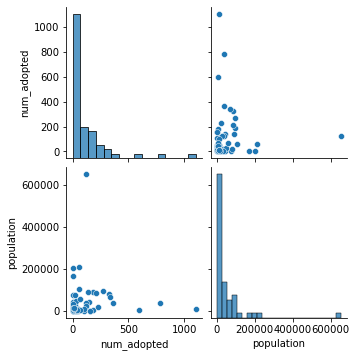

In [85]:
sns.pairplot(city_count)

In [86]:
city_count.corr()

,num_adopted,population
num_adopted,1.00000,-0.00614
population,-0.00614,1.00000


**A:** The size of a city has virtually no correlation to adoption rates

**Does average age affect adoption rates?**

In [87]:
census_avg_age = census.loc[:,'Total population Median age (years)']
census_avg_age.rename('Ave Age', inplace=True)
census_avg_age.head()

index
Aberdeen           35.40000
Aberdeen Gardens   57.60000
Addy               44.40000
Ahtanum            38.20000
Airway Heights     35.70000
Name: Ave Age, dtype: float64

In [88]:
city_count.head()

,num_adopted,population
Auburn,5,74527
Bainbridge Island,7,23343
Battle Ground,9,18576
Bellingham,324,82944
Bothell,143,41207


In [89]:
city_count = city_count.join(census_avg_age, how='left')
city_count.rename(columns={"Total population Median age (years)":"Avg Age"}, inplace=True)
city_count.head(10)

,num_adopted,population,Ave Age
Auburn,5,74527,35.30000
Bainbridge Island,7,23343,48.20000
Battle Ground,9,18576,33.00000
Bellingham,324,82944,31.20000
Bothell,143,41207,38.50000
Bremerton,124,39017,32.10000
Burlington,115,8509,35.50000
Chehalis,36,7314,33.90000
Chewelah,3,2592,47.00000
Coupeville,48,2141,52.70000


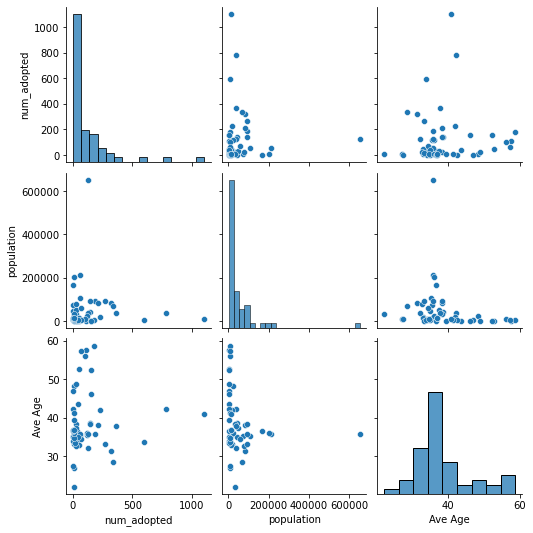

In [90]:
city_count.dropna()
sns.pairplot(city_count)

In [91]:
city_count.corr()

,num_adopted,population,Ave Age
num_adopted,1.00000,-0.00614,0.04531
population,-0.00614,1.00000,-0.18495
Ave Age,0.04531,-0.18495,1.00000


**What are the most adopetd breeds? Alternately, what are the most available breeds?**

In [92]:
adopted['breed_primary'].value_counts(sort=True).head()

Domestic Short Hair     4033
Domestic Medium Hair     690
Tabby                    613
Domestic Long Hair       449
Siamese                  214
Name: breed_primary, dtype: int64

**What are the most adopted breeds in each city?**

In [93]:
adopted_by_city = adopted.groupby(['city', 'breed_primary']).size().unstack()
adopted_by_city.fillna(0, inplace=True)
adopted_by_city.sample(10)

breed_primary,Abyssinian,American Bobtail,American Shorthair,Balinese,Bengal,Birman,Bombay,British Shorthair,Burmese,Calico,Chartreux,Devon Rex,Dilute Calico,Dilute Tortoiseshell,Domestic Long Hair,Domestic Medium Hair,Domestic Short Hair,Egyptian Mau,Exotic Shorthair,Extra-Toes Cat / Hemingway Polydactyl,Himalayan,Maine Coon,Manx,Munchkin,Norwegian Forest Cat,Persian,Pixiebob,Ragamuffin,Ragdoll,Russian Blue,Scottish Fold,Siamese,Silver,Singapura,Snowshoe,Tabby,Tiger,Tonkinese,Torbie,Tortoiseshell,Turkish Angora,Turkish Van,Tuxedo
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Roslyn,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
Spokane,0.00000,0.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,0.00000,0.00000,0.00000,5.00000,6.00000,23.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,0.00000,1.00000,0.00000,0.00000,9.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Lacey,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Chehalis,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,7.00000,0.00000,23.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
Quincy,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Port Townsend,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,16.00000,6.00000,80.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Puyallup,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,48.00000,48.00000,263.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Federal Way,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,8.00000,13.00000,141.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,0.00000,0.00000,4.00000,8.00000,0.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000
Olympia,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,4.00000,4.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000


In [94]:
most_adopted_by_city = adopted_by_city.idxmax(axis=1)
print("Most adopted cat per city:")
most_adopted_by_city

Most adopted cat per city:


city
Auburn                Domestic Short Hair
Bainbridge Island     Domestic Short Hair
Battle Ground         Domestic Short Hair
Bellingham            Domestic Short Hair
Bothell               Domestic Short Hair
Bremerton                           Tabby
Burlington                          Tabby
Chehalis              Domestic Short Hair
Chewelah              Domestic Short Hair
Coupeville            Domestic Short Hair
Des Moines             American Shorthair
Everett               Domestic Short Hair
Federal Way           Domestic Short Hair
Ferndale              Domestic Short Hair
Friday Harbor         Domestic Short Hair
Kelso                               Tabby
Kennewick             Domestic Short Hair
Kirkland              Domestic Short Hair
La Center                          Birman
Lacey                              Bengal
Langley                             Tabby
Long Beach            Domestic Short Hair
Longview              Domestic Short Hair
Maple Valley          Domesti

## Handling Outliers

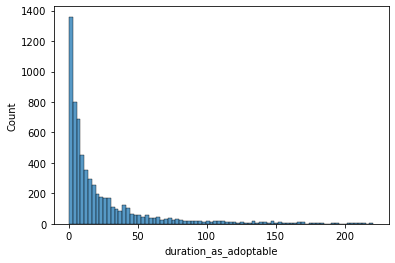

In [95]:
mean = adopted['duration_as_adoptable'].mean()
std = adopted['duration_as_adoptable'].std()
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
adopted_trimmed = adopted[(adopted['duration_as_adoptable'] < upper) & (adopted['duration_as_adoptable'] > lower)]

sns.histplot(x='duration_as_adoptable', stat='count', data=adopted_trimmed)


In [96]:
# save cleaned df_dogs
datapath = 'data'
save_file(adopted_trimmed, 'cats_trimmed.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/cats_trimmed.csv"


# Feature Selection

In [97]:
df = adopted_trimmed[['gender', 'size', 'coat', 'duration_as_adoptable', 'hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current', 'goodwith_children', 'goodwith_dogs', 'goodwith_cats']]
df.loc[:, ['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']] = adopted_trimmed.loc[:, ['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current']].astype('int64')
df = pd.get_dummies(df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [98]:
df.head()

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Female,gender_Male,size_Extra Large,size_Large,size_Medium,size_Small,coat_Hairless,coat_Long,coat_Medium,coat_Short,coat_unknown,goodwith_children_False,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_False,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_False,goodwith_cats_True,goodwith_cats_unknown
0,2.58473,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,10.62697,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,30.96750,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,110.01177,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,81.00318,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 6799
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration_as_adoptable      6489 non-null   float64
 1   hasimage                   6489 non-null   int64  
 2   hasvideo                   6489 non-null   int64  
 3   spayed_neutered            6489 non-null   int64  
 4   house_trained              6489 non-null   int64  
 5   special_needs              6489 non-null   int64  
 6   shots_current              6489 non-null   int64  
 7   gender_Female              6489 non-null   uint8  
 8   gender_Male                6489 non-null   uint8  
 9   size_Extra Large           6489 non-null   uint8  
 10  size_Large                 6489 non-null   uint8  
 11  size_Medium                6489 non-null   uint8  
 12  size_Small                 6489 non-null   uint8  
 13  coat_Hairless              6489 non-null   uint8

In [100]:
# drop one of each of the dummy category columns so those features don't double-weight anything
df.drop(['size_Extra Large', 'gender_Female', 'coat_Hairless', 'goodwith_children_False', 'goodwith_dogs_False', 'goodwith_cats_False'], axis=1, inplace=True)

In [101]:
df_corr = df.corr()
df_corr

,duration_as_adoptable,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Male,size_Large,size_Medium,size_Small,coat_Long,coat_Medium,coat_Short,coat_unknown,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_True,goodwith_cats_unknown
duration_as_adoptable,1.00000,0.07919,0.02126,-0.05301,0.11404,0.10411,-0.06044,-0.01451,0.07256,-0.03145,-0.02568,0.02007,-0.00969,-0.01185,0.01663,0.04728,-0.09490,0.03960,-0.08954,0.09596,-0.12869
hasimage,0.07919,1.00000,0.03565,-0.04810,0.15241,0.00059,-0.01707,-0.00466,0.03247,-0.03473,0.01603,0.02464,-0.00261,0.00709,-0.04962,0.07118,-0.09408,0.07164,-0.08478,0.12726,-0.13754
hasvideo,0.02126,0.03565,1.00000,0.05627,0.14799,0.00379,0.03498,0.02920,-0.01363,0.05230,-0.05241,-0.00348,0.00284,0.01184,-0.02722,0.20183,-0.17394,0.19558,-0.16265,0.13074,-0.12361
spayed_neutered,-0.05301,-0.04810,0.05627,1.00000,0.06188,0.01573,0.32169,0.02002,0.05693,-0.06843,0.03540,-0.01028,-0.04069,0.02343,0.03332,0.02314,-0.05686,0.03974,-0.01477,-0.05340,0.03180
house_trained,0.11404,0.15241,0.14799,0.06188,1.00000,0.05608,-0.01137,0.00748,0.12451,-0.05219,-0.03980,0.01278,0.03135,-0.08115,0.11602,0.31284,-0.33213,0.23345,-0.27208,0.43790,-0.46609
special_needs,0.10411,0.00059,0.00379,0.01573,0.05608,1.00000,-0.01161,0.01172,0.07581,-0.03418,-0.02717,0.01968,-0.01153,-0.03986,0.08514,0.02343,-0.02894,-0.00263,-0.02253,-0.00088,-0.02048
shots_current,-0.06044,-0.01707,0.03498,0.32169,-0.01137,-0.01161,1.00000,0.00553,-0.04685,0.10183,-0.08560,-0.00934,-0.11114,0.09723,-0.01353,-0.11825,0.12218,-0.02438,0.12638,-0.06863,0.07912
gender_Male,-0.01451,-0.00466,0.02920,0.02002,0.00748,0.01172,0.00553,1.00000,0.15287,-0.05477,-0.06352,-0.00925,0.02629,-0.01249,-0.00357,0.00890,0.00567,0.01288,-0.00285,0.02745,-0.00859
size_Large,0.07256,0.03247,-0.01363,0.05693,0.12451,0.07581,-0.04685,0.15287,1.00000,-0.56130,-0.11435,0.09909,0.04515,-0.10103,0.00660,0.09607,-0.11311,0.02336,-0.06151,0.04967,-0.08004
size_Medium,-0.03145,-0.03473,0.05230,-0.06843,-0.05219,-0.03418,0.10183,-0.05477,-0.56130,1.00000,-0.73988,-0.08536,-0.04972,0.09235,0.00074,-0.04746,0.15529,0.00612,0.08798,0.00215,0.04631


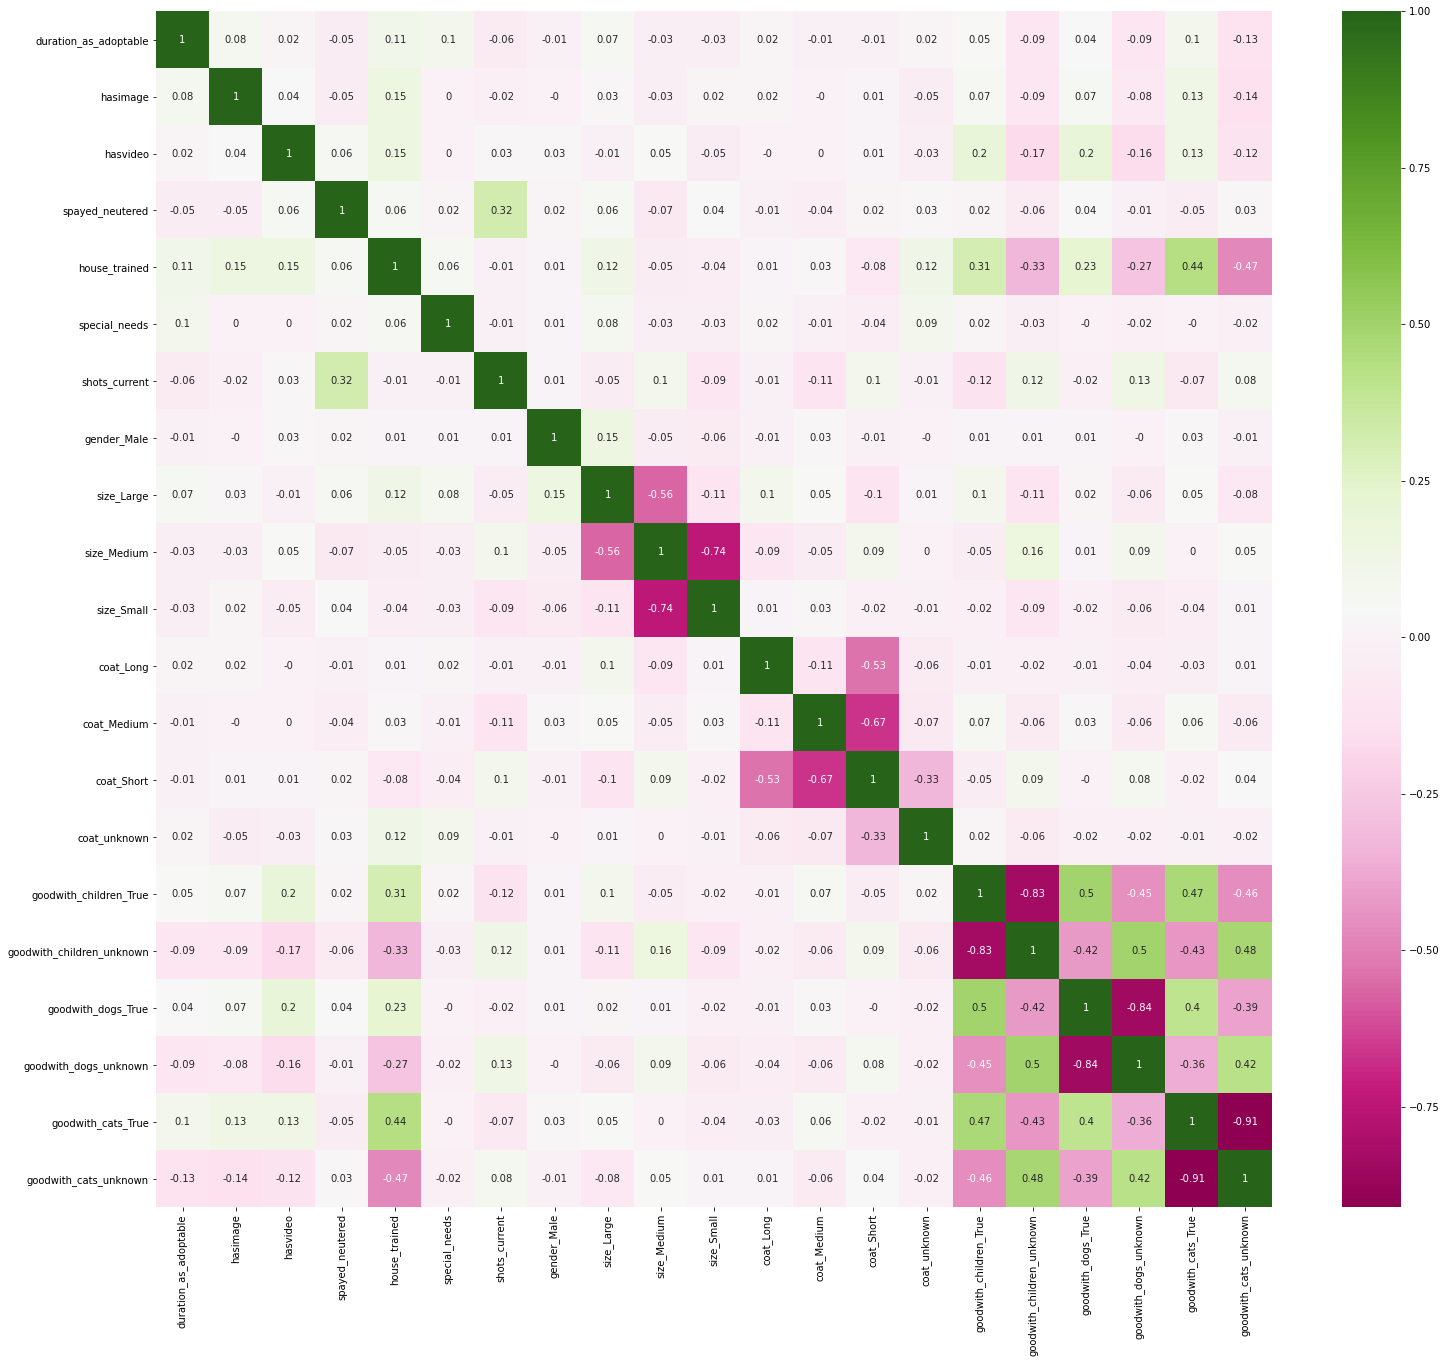

In [102]:
plt.figure(figsize=(25, 22))
sns.heatmap(round(df_corr, 2), annot = True, cmap="PiYG")

In [103]:
len(df) * .7, len(df) * .3

(4542.299999999999, 1946.6999999999998)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='duration_as_adoptable'), 
                                                    df.duration_as_adoptable, test_size=0.3, 
                                                    random_state=47)

In [105]:
X_train.shape, X_test.shape

((4542, 20), (1947, 20))

In [106]:
y_train.shape, y_test.shape

((4542,), (1947,))

## Random Forest Model

In [107]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=192)
)

In [108]:
rf_default_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [109]:
rf_cv_scores = rf_default_results['test_score']
rf_cv_scores

array([-0.06112694, -0.10195316, -0.02288813, -0.07902289, -0.01421762])

In [110]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.05584175005545835, 0.03319659524509519)

In [111]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [112]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [113]:
from sklearn.utils import parallel_backend

with parallel_backend('threading'):
    rf_grid_cv.fit(X_train, y_train)

In [114]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

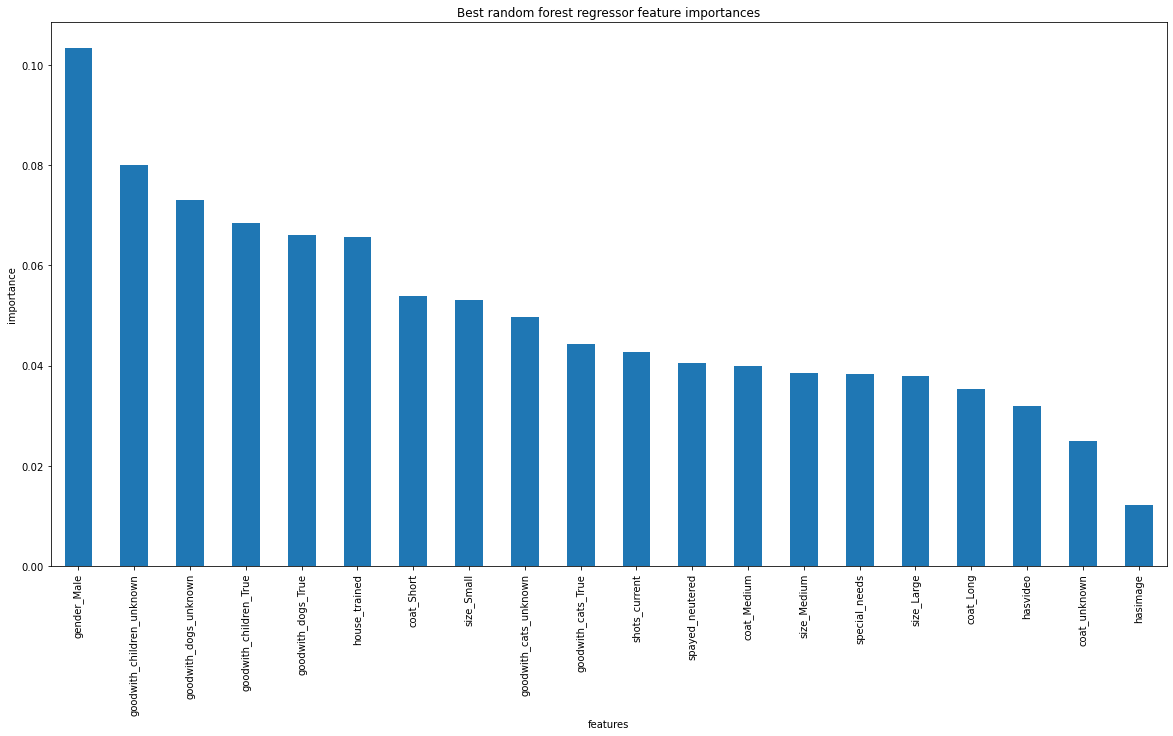

In [115]:
plt.subplots(figsize=(20, 10))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)[:50]
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## XG Boost Model

In [116]:
import xgboost as xgb

In [117]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 192)

In [118]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

y_test.shape, preds.shape

[17:13:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


((1947,), (1947,))

In [119]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("RMSE/SD: % f" %(rmse/adopted.duration_as_adoptable.std()))

RMSE: 33.823077
RMSE/SD:  0.527692


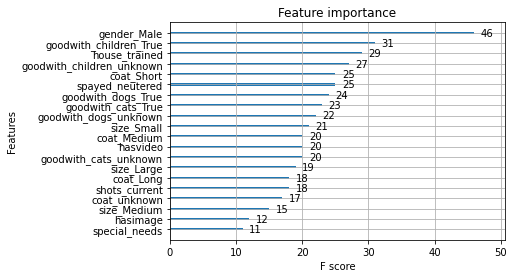

In [120]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [121]:
y_train.shape

(4542,)

In [122]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [123]:
param = {
    "booster":"gblinear", 
    "objective":"reg:squarederror"} 

steps = 20

In [124]:
xgb_r = xgb.train(params = param, dtrain = D_train, num_boost_round = 10)
pred = xgb_r.predict(D_test)

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))
print("RMSE/SD: % f" %(rmse/adopted.duration_as_adoptable.std()))

RMSE :  33.802774
RMSE/SD:  0.527376


## PCA
**For kicks and giggles**

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=10)
pca.fit_transform(X_train, y_train)

array([[-1.56083740e-01, -7.52414414e-01,  1.05711881e-03, ...,
         2.73960672e-01, -2.68223622e-01,  1.29275037e-01],
       [-7.45155854e-01, -1.54471364e-01, -2.61372410e-01, ...,
        -1.76974969e-01,  1.10170663e-02, -1.28651304e-01],
       [ 5.58428180e-01, -4.38672728e-01, -4.90895938e-01, ...,
        -3.53902035e-03, -1.14786942e-01, -2.14757449e-01],
       ...,
       [ 9.23749632e-01, -5.36242566e-01,  1.94267281e-01, ...,
         4.08641943e-02, -1.20817157e-01, -4.48905323e-02],
       [-1.00091641e+00,  6.14557778e-01,  8.62196127e-01, ...,
        -8.69101470e-02, -1.61698487e-01, -2.12875222e-01],
       [-1.05760304e+00, -8.19612879e-02, -2.87981886e-02, ...,
         3.50555151e-02, -1.09267361e-01, -3.41368175e-02]])

In [128]:
features = range(pca.n_components_)

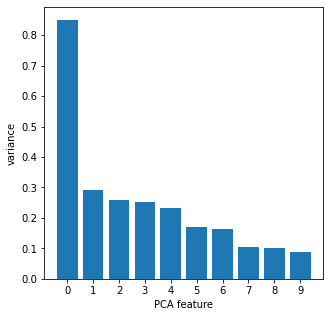

In [129]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel("variance")
plt.xlabel("PCA feature")
plt.show()

In [130]:
pca_components = pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'])
pca_components

,hasimage,hasvideo,spayed_neutered,house_trained,special_needs,shots_current,gender_Male,size_Large,size_Medium,size_Small,coat_Long,coat_Medium,coat_Short,coat_unknown,goodwith_children_True,goodwith_children_unknown,goodwith_dogs_True,goodwith_dogs_unknown,goodwith_cats_True,goodwith_cats_unknown
PC-1,0.02728,0.04459,0.00125,0.31245,0.00434,-0.02995,0.00404,0.04130,-0.05140,0.00933,0.00659,0.04115,-0.05605,0.00880,0.36936,-0.39802,0.28353,-0.32250,0.44752,-0.45804
PC-2,-0.00578,-0.00784,0.05293,-0.07251,0.01452,-0.05503,0.19321,0.20928,-0.55193,0.33781,0.15622,0.26802,-0.46288,0.03783,0.09564,-0.19304,0.02210,-0.12256,-0.26107,0.21617
PC-3,-0.00910,0.01457,0.04678,-0.23257,-0.00735,-0.00413,-0.50060,-0.03766,-0.17597,0.21443,-0.11641,-0.27933,0.44044,-0.04458,0.18456,-0.24122,0.23646,-0.25971,-0.25003,0.22072
PC-4,0.00051,-0.00664,-0.05638,0.05253,0.00115,-0.02530,-0.78993,-0.12026,0.16622,-0.04184,0.14980,0.27161,-0.46849,0.04593,-0.04576,0.04610,-0.04672,0.02265,0.01137,-0.02654
PC-5,-0.01961,0.04525,-0.00413,-0.26612,-0.00437,0.00308,0.24321,-0.12707,0.49666,-0.36314,0.05552,0.13135,-0.20806,0.01993,0.21856,-0.14360,0.33171,-0.30994,-0.24510,0.27257
PC-6,-0.01583,-0.04282,-0.18538,-0.67466,-0.02462,-0.05807,0.03829,-0.09769,-0.09401,0.19207,-0.00583,0.10936,-0.04096,-0.06141,-0.24328,0.29452,0.22392,-0.22996,0.31432,-0.28719
PC-7,0.01529,0.02153,0.11479,0.48455,0.00720,0.06382,-0.00059,0.03754,-0.05872,0.01974,0.04983,-0.06338,-0.00091,0.01546,-0.40891,0.42501,0.38963,-0.46223,-0.12183,0.08409
PC-8,-0.01303,-0.00663,0.33710,-0.21203,0.03166,0.15583,-0.05674,0.28322,-0.05682,-0.23553,0.61046,-0.51321,-0.13602,0.03791,-0.01233,0.00873,-0.00573,0.01572,0.07248,-0.10969
PC-9,0.05071,-0.03831,-0.83089,0.12028,0.01077,-0.30694,0.02092,0.08589,-0.02721,-0.05873,0.29187,-0.28905,-0.01207,0.00965,0.01489,-0.01224,-0.03654,-0.06734,-0.07340,0.06464
PC-10,0.00262,-0.01566,-0.08199,-0.09451,0.02605,-0.04398,-0.15261,0.69474,-0.18227,-0.51362,-0.29091,0.25123,0.10909,-0.06839,0.01725,0.09691,0.06457,-0.01105,0.01378,0.00298


In [131]:
abs(pca_components.loc['PC-1', :]).sort_values(ascending=False )

goodwith_cats_unknown       0.45804
goodwith_cats_True          0.44752
goodwith_children_unknown   0.39802
goodwith_children_True      0.36936
goodwith_dogs_unknown       0.32250
house_trained               0.31245
goodwith_dogs_True          0.28353
coat_Short                  0.05605
size_Medium                 0.05140
hasvideo                    0.04459
size_Large                  0.04130
coat_Medium                 0.04115
shots_current               0.02995
hasimage                    0.02728
size_Small                  0.00933
coat_unknown                0.00880
coat_Long                   0.00659
special_needs               0.00434
gender_Male                 0.00404
spayed_neutered             0.00125
Name: PC-1, dtype: float64